In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#构建待优化变量
x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)
#构建梯度记录器
with tf.GradientTape(persistent=True) as tape:
    #非tf.Variable类型的张量需要认为色湖之记录梯度信息
    tape.watch([w1,b1,w2,b2])
    #构建2层线性网络
    y1 = x*w1+b1
    y2 = y1*w2+b2
    

#独立求解出各个偏导数
dy2_dy1 = tape.gradient(y2,[y1])[0]
dy1_dw1 = tape.gradient(y1,[w1])[0]
dy2_dw1 = tape.gradient(y2,[w1])[0]

#验证链式法则
print(dy2_dy1*dy1_dw1)
print(dy2_dw1)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


#### Himmelblau函数优化实战
#### f(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


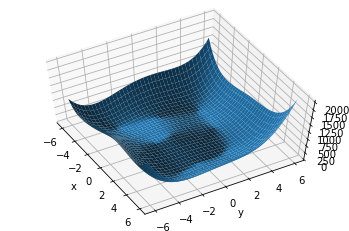

In [10]:
#实现Himmelblau函数
def himmelblau(x):
    return (x[0]**2 + x[1]-11)**2 +(x[0]+x[1]**2 -7)**2

#通过np.meshgrid函数生成二维平面网格点坐标：
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
print('x,y range:',x.shape,y.shape)
#生成x-y平面采样网格点，方便可视化
X,Y = np.meshgrid(x,y)
print('X,Y maps:',X.shape, Y.shape)
Z = himmelblau([X,Y])
#回执himmelblau函数曲面
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [15]:
#利用TF自动求导来求出函数在x，y处的梯度，并循环迭代更新：
#参数的初始化值对优化的影响不容忽视，可以通过尝试不同的初始化值检验函数优化的极小值情况；
x = tf.constant([0.,4.])#初始化参数
for step in range(200): #循环优化200次
    with tf.GradientTape() as tape:#梯度跟踪
        tape.watch([x])#加入梯度跟踪列表
        y = himmelblau(x)#前向传播
    #反向传播
    grads = tape.gradient(y,[x])[0]
    #更新参数，0.01为学习率
    x -= 0.01*grads
    #打印优化的极小值
    if step % 20 ==19:
        print('step {}: x={}, f(x)={}'.format(step,x.numpy(),y.numpy()))
        print(grads)
        

step 19: x=[-2.8050668  3.1313083], f(x)=6.948932878003689e-07
tf.Tensor([ 0.00945999 -0.00078335], shape=(2,), dtype=float32)
step 39: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf.Tensor([-9.5367432e-07 -5.9725044e-06], shape=(2,), dtype=float32)
step 59: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf.Tensor([-9.5367432e-07 -5.9725044e-06], shape=(2,), dtype=float32)
step 79: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf.Tensor([-9.5367432e-07 -5.9725044e-06], shape=(2,), dtype=float32)
step 99: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf.Tensor([-9.5367432e-07 -5.9725044e-06], shape=(2,), dtype=float32)
step 119: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf.Tensor([-9.5367432e-07 -5.9725044e-06], shape=(2,), dtype=float32)
step 139: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf.Tensor([-9.5367432e-07 -5.9725044e-06], shape=(2,), dtype=float32)
step 159: x=[-2.805118   3.1313124], f(x)=2.2737367544323206e-13
tf

(2000, 2) (2000,)


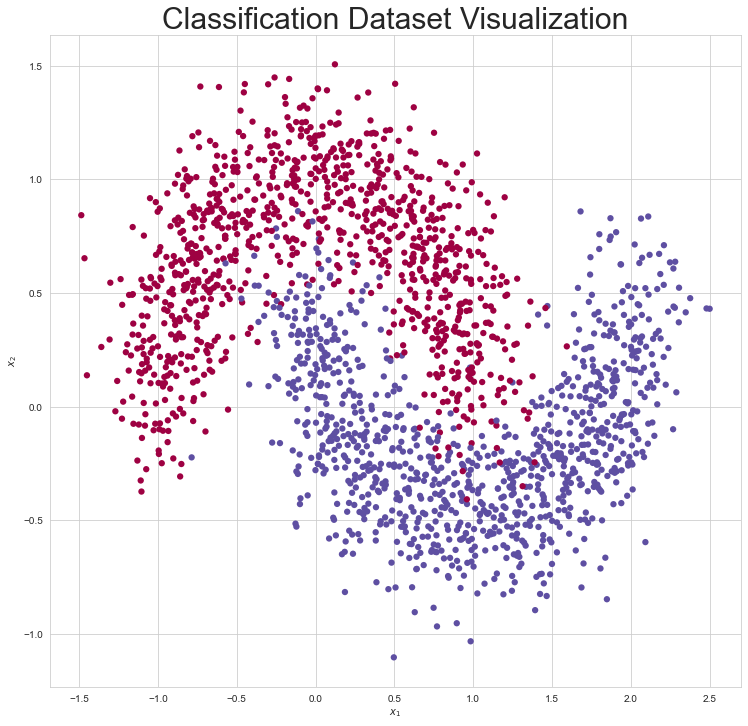

Epoch:#0,MSE:0.248177
Accuracy:49.50%
Epoch:#10,MSE:0.148224
Accuracy:83.17%
Epoch:#20,MSE:0.098881
Accuracy:87.50%
Epoch:#30,MSE:0.096485
Accuracy:88.83%
Epoch:#40,MSE:0.096296
Accuracy:89.00%
Epoch:#50,MSE:0.096225
Accuracy:89.00%
Epoch:#60,MSE:0.096160
Accuracy:88.83%
Epoch:#70,MSE:0.096090
Accuracy:88.83%
Epoch:#80,MSE:0.096011
Accuracy:88.83%
Epoch:#90,MSE:0.095917
Accuracy:88.83%


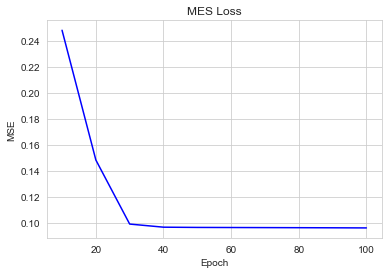

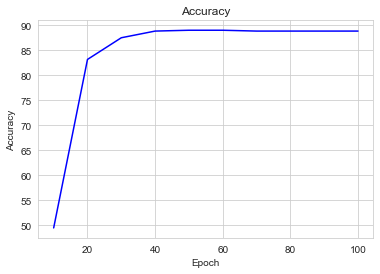

In [4]:
#反向传播实战



#绘制数据集的分布，X为2D坐标，y为数据点的标签
def make_plot(X,y,plot_name,file_name=None,XX=None,preds=None,dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$x_1$",ylabel="$x_2$")
    plt.title(plot_name,fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if (XX is not None and YY is not None and preds is not None):
        plt.contourf(XX,YY,preds.reshape(XX.shape),25,alpha=1,cmap=cm.Spectral)
        plt.contour(XX,YY,preds.reshape(XX.shape),levels=[.5],cmap="Greys",vmin=0,vmax=.6)
        #绘制散点图，根据标签区分颜色
    plt.scatter(X[:,0],X[:,1],c=y.ravel(),s=40,cmap=plt.cm.Spectral,edgecolors='none')
    #plt.savefig('dataset.svg')
    #plt.close()
    #调用make_plot函数绘制数据的分布，其中X为2D坐标，y为标签



class Layer:
    #全连接网络层
    def __init__(self,n_input,n_neurons,activation=None,weights=None,bias=None):
        """
        :param int n_input:输入节点数
        :param int n_neurons:输出节点数
        :param str activation:激活函数类型
        ：param weights:权值张量，默认类内部生成
        ：param bias:偏置，默认类内部生成
        """
        #通过正太分布初始化网络权值，初始化非常重要，不合适的初始化将导致网络不收敛
        self.weights = weights if weights is not None else np.random.randn(n_input,n_neurons)*np.sqrt(1/n_neurons)
        self.bias = bias if bias is not None else np.random.randn(n_neurons)*0.1
        self.activation = activation#激活函数类型
        self.last_activation=None #激活函数的输出值o
        self.error = None #用于计算当前层的delta变量的中间变量
        self.delta = None #记录当前层的delta变量，用于计算梯度
    
    #实现网络层的前向传播
    def activate(self,x):
        #前向传播
        r = np.dot(x,self.weights)+self.bias #X@W+b
        #通过激活函数，得到全连接层的输出o
        self.last_activation=self._apply_activation(r)
        return self.last_activation
    
    #self._apply_activation实现不同的激活函数的前向计算过程
    def _apply_activation(self,r):
        #计算激活函数的输出
        if self.activation  is None:
            return r #无激活函数，直接返回
        #RELU激活函数
        elif self.activation == 'relu':
            return np.maximum(r,0)
        
        #tanh
        elif self.activation == 'tanh':
            return np.tanh(r)
        
        #sigmoid
        elif self.activation == 'sigmoid':
            return 1/(1+np.exp(-r))
        
        return r
    
    #不同激活函数导数的计算
    def apply_activation_derivative(self,r):
        #无激活函数，导数为1
        if self.activation is None:
            return np.ones_like(r)
        #RELU激活函数导数的实现
        elif self.activation == 'relu':
            grad = np.array(r,copy=True)
            grad[r > 0] =1.
            grad[r <= 0] = 0.
            return grad
        
        #tanh函数导数的实现
        elif self.activation == 'tanh':
            return 1-r**2
        
        #sigmoid函数的实现
        elif self.activation == 'sigmoid':
            return r*(1-r)
        
        return r
    
#实现单层网络后，下面实现网络模型的的类NeuralNetwork，它内部维护各层的网络层Layer
#类对象，可以通过add_layer函数追加网络层，实现如下：
class NeuralNetwork:
    #神经网络大类
    def __init__(self):
        self._layers = [] #网络层对象列表
        
    def add_layer(self,layer):
        #追加网络
        self._layers.append(layer)
        
    #前向传播，循环调用单个网络层对象的前向计算函数
    def feed_forward(self,X):
        for layer in self._layers:
            #依次通过各个网络层
            X = layer.activate(X)
        return X
    
    #网络模型的反向传播实现稍复杂，需要从最末层开始，计算每层的delta变量，根据
    #推导的公式，将计算出的delta变量存储在Layer类的delta变量中
    def backpropagation(self,X,y,learning_rate):
        #反向传播算法实现
        #前向计算，得到输出值
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):#反向循环
            layer = self._layers[i]#得到当前层的对象
            #如果是输出层
            if layer == self._layers[-1]:#对于输出层
                layer.error = y - output #计算2分类任务的均方差的导数
                #关键步骤：计算最后一层的delta，参考输出层的梯度公式
                layer.delta = layer.error*layer.apply_activation_derivative(output)
            else:#如果是隐藏层
                next_layer = self._layers[i+1]#得到下一层对象
                layer.error = np.dot(next_layer.weights,next_layer.delta)
                #关键步骤：计算隐藏层的delta，参考隐藏层的梯度公式
                layer.delta = layer.error*layer.apply_activation_derivative(layer.last_activation)
        #反向计算完每层的delta之后，按照公式计算每一层的梯度，并更新网络参数
        for i in range(len(self._layers)):
            layer = self._layers[i]
            #o_i为上一层网络的输出
            o_i = np.atleast_2d(X if i == 0 else self._layers[i-1].last_activation)
            #梯度下降算法，delta是公式中的负数，故这里用加号
            layer.weights += layer.delta*o_i.T*learning_rate
    #网络训练
    def train(self,X_train,X_test,y_train,y_test,learning_rate,max_epochs):
        #网络训练函数
        #one-hot编码
        y_onehot = np.zeros((y_train.shape[0],2))
        y_onehot[np.arange(y_train.shape[0]),y_train] = 1
    
        #将one-hot编码后的真实标签与网络的输出计算均方差，并调用反向传播函数更新网络参数，
        #循环迭代训练1000遍：
        mses = []
        accs = []
        for i in range(max_epochs):#训练1000个epoch
            for j in range(len(X_train)):#一次训练一个样本
                self.backpropagation(X_train[j],y_onehot[j],learning_rate)
            if i % 10 == 0:
                #打印出MSE Loss
                mse = np.mean(np.square(y_onehot-self.feed_forward(X_train)))
                mses.append(mse)
                print('Epoch:#%s,MSE:%f' %(i,float(mse)))
                acc = self.accuracy(self.predict(X_test),y_test.flatten())*100
                accs.append(acc)
                #统计打印准确率
                print('Accuracy:%.2f%%' % (acc))
        return mses,accs
    
    def predict(self,X):
        return self.feed_forward(X)
    
    def accuracy(self,X,y):
        return np.sum(np.equal(np.argmax(X,axis=1),y))/y.shape[0]

def main():
    #数据集的采集使用sklearn提供的make_moons函数实现
    N_SAMPLES = 2000 #采集点数
    TEST_SIZE = 0.3#测试数据比率
    #利用工具函数直接生成数据集
    #利用工具函数直接生成数据集
    X,y = make_moons(n_samples=N_SAMPLES, noise=0.2,random_state=100)
    #将2000各点按7：3分割为训练集和测试集
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = TEST_SIZE, random_state=42)
    print(X.shape,y.shape)
    
    make_plot(X,y,"Classification Dataset Visualization")
    plt.show()
    
    #实现网络对象，添加4层全连接层
    nn=NeuralNetwork()#实例化网络类
    nn.add_layer(Layer(2,25,'sigmoid'))#隐藏层1，2=>25
    nn.add_layer(Layer(25,50,'sigmoid'))#隐藏层2，25=>50
    nn.add_layer(Layer(50,25,'sigmoid'))#隐藏层3，50=>25
    nn.add_layer(Layer(25,2,'sigmoid'))#输出层，25=>2
    mses,accuracys = nn.train(X_train,X_test,y_train,y_test,0.01,100)

    x = [i for i in range(10, 101, 10)]

    # 绘制MES曲线
    plt.title("MES Loss")
    plt.plot(x, mses[:11], color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.show()

    # 绘制Accuracy曲线
    plt.title("Accuracy")
    plt.plot(x, accuracys[:11], color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()
            
if __name__ == "__main__":
    main()

In [58]:

x = [i for i in range(0, 101, 10)]

In [59]:
x


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]